##1. Lista de librerias

In [1]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 2.3 MB/s eta 0:00:00


In [2]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np
import random
import warnings
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import check_array
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
random.seed(13)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2 Funciones

In [4]:
%run '/content/drive/MyDrive/Colab Notebooks/Tesis_Functions.ipynb'

balancear_datos Loaded
Selectkbest_features Loaded
rfe_features Loaded
Integración de Variables Loaded
evaluacion de los modelos Loaded
Pca_components Loaded
Improtancia con XGBoost y Random forest Loaded
XG_BOOST Regression Loaded
Random Forest Loaded
quitar_tildes Loaded
completar_datos_serie_tiempo Loaded
eliminar_filas_nan Loaded
cambiar_numeros_menores Loaded
normalize_variables Loaded
calcular_crecimiento_ingresos Loaded
obtener_variables_correlacionadas Loaded
generar_componentes_principales Loaded
rfe_with_elasticnet Loaded
calcular_crecimiento_promedio_por_categoria_Predial Loaded
categorizar_por_boxplot Loaded
calcular_crecimiento_promedio_por_categoria Loaded
limitar_atipicos Loaded
crear_dummies Loaded


##3 Generacion de variables relevantes

###3.1. Carga de datos

In [48]:
#Carga de la Base 0
#Base_0 = pd.read_csv('/content/drive/My Drive/4_Proyect_Final/1_Datos/df_unido_Normalizada_sin_corr.csv')

Base_0 = pd.read_csv('/content/drive/My Drive/4_Proyect_Final/1_Datos/df_unido_Normalizada_class.csv')

<ipython-input-50-0da430941cbd>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


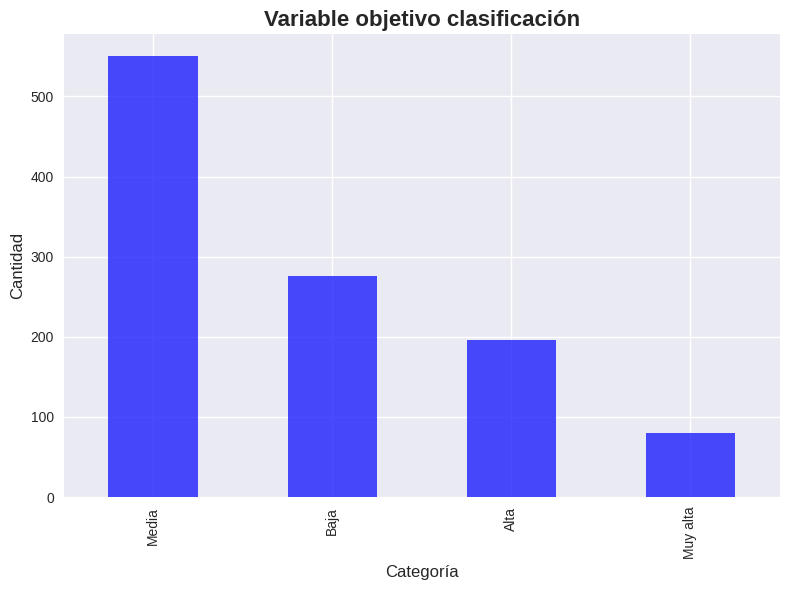

In [50]:
# Contar la cantidad de cada categoría en la columna "categoria"
conteo_categorias = Base_0['recomendacion'].value_counts()
# Configurar el estilo y tamaño del gráfico
plt.style.use('seaborn')
plt.figure(figsize=(8, 6))
# Generar el gráfico de barras
conteo_categorias.plot(kind='bar', color='blue', alpha=0.7)
# Configurar el título y etiquetas del gráfico
plt.title('Variable objetivo clasificación', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [51]:
#Convertir varable objetivo en numerica
# Instanciar el LabelEncoder
label_encoder = LabelEncoder()

# Codificar la variable objetivo 'Clase' de palabras a números
Base_0['Y_Objetivo'] = label_encoder.fit_transform(Base_0['recomendacion'])

In [29]:
Base_0

,Id_Municipio_Dane,Nombre_Municipio,Id_Departamento_Dane,Nombre_Departamento,Predial,recomendacion,IPS_Nivel_1,IPS_Nivel_2,IPS_Nivel_3,IPS_Clinica,...,vivienda_servicios_publicos_CoberturaGasNaturalCenso,vivienda_servicios_publicos_CoberturaGasNaturalRuralCenso,vivienda_servicios_publicos_CoberturaGasNaturalUrbanoCenso,vivienda_servicios_publicos_CoberturaInternetCenso,vivienda_servicios_publicos_CoberturaInternetRuralCenso,vivienda_servicios_publicos_CoberturaInternetUrbanaCenso,vivienda_servicios_publicos_DeficitCualitativoViviendaCenso,vivienda_servicios_publicos_DeficitCuantitativoViviendaCenso,vivienda_servicios_publicos_PenetracionBandaAncha,Y_Objetivo
0,5001,Medellin,5,Antioquia,133.859306,Media,0.153846,0.50,0.222222,0.3625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003260,2
1,5002,Abejorral,5,Antioquia,104.386980,Media,0.076923,0.00,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026511,2
2,5004,Abriaqui,5,Antioquia,92.937014,Media,0.000000,0.00,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004336,2
3,5021,Alejandria,5,Antioquia,212.680226,Media,0.076923,0.00,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004397,2
4,5030,Amaga,5,Antioquia,192.535616,Media,0.076923,0.00,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004852,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,97666,Taraira,97,Vaupés,1406.942589,Muy alta,0.000000,0.00,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000118,3
1098,99001,Puerto Carreno,99,Vichada,253.440132,Alta,0.000000,0.25,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037458,0
1099,99524,La Primavera,99,Vichada,1493.291755,Muy alta,0.000000,0.00,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001127,3
1100,99624,Santa Rosalia,99,Vichada,763.878456,Muy alta,0.000000,0.00,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3


###3.2. Selección de Variables con Selectkbest

In [52]:
columnas_a_eliminar = ['Id_Municipio_Dane','Nombre_Municipio','Id_Departamento_Dane','Nombre_Departamento','Predial','recomendacion','Y_Objetivo']
Base_0_X=Base_0.drop(columnas_a_eliminar, axis=1)
Base_0_Y=pd.DataFrame(Base_0['Y_Objetivo'])
y=np.ravel(Base_0_Y.values)


In [53]:
Varaibles_Selectkbest=Selectkbest_features(Base_0_X, y, Base_0_X.shape[1],f_classif)

In [54]:
Varaibles_Selectkbest=Selectkbest_features(Base_0_X, y, Base_0_X.shape[1],f_classif)

#Calcular la suma total de la columna
suma_total = Varaibles_Selectkbest['Puntuacion'].sum()

# Normalizar los valores para que sumen 100%
Varaibles_Selectkbest['Importance_Selectkbest'] = (Varaibles_Selectkbest['Puntuacion'] / suma_total)

In [55]:
Varaibles_Selectkbest

,Variable,Puntuacion,Importance_Selectkbest
0,IPS_Nivel_1,7.423191,0.003955
1,IPS_Nivel_2,0.917706,0.000489
2,IPS_Nivel_3,2.754653,0.001468
3,IPS_Clinica,0.002865,0.000002
4,IPS_Otras,0.085358,0.000045
...,...,...,...
1951,vivienda_servicios_publicos_CoberturaInternetR...,0.000000,0.000000
1952,vivienda_servicios_publicos_CoberturaInternetU...,0.000000,0.000000
1953,vivienda_servicios_publicos_DeficitCualitativo...,0.000000,0.000000
1954,vivienda_servicios_publicos_DeficitCuantitativ...,0.000000,0.000000


###3.4. Selección de Variables RFE

In [56]:
varibales_rfe=select_features_with_rfe_Clasisification(Base_0_X, y, Base_0_X.shape[1])
varibales_rfe['Importance'] = varibales_rfe['Importance'].abs()
#Calcular la suma total de la columna
suma_total = varibales_rfe['Importance'].sum()
# Normalizar los valores para que sumen 100%
varibales_rfe['Importance_ElasticNet'] = (varibales_rfe['Importance'] / suma_total)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
varibales_rfe

,Variable,Importance,Importance_ElasticNet
0,IPS_Nivel_1,0.420815,0.001663
1,IPS_Nivel_2,0.195745,0.000773
2,IPS_Nivel_3,0.192182,0.000759
3,IPS_Clinica,0.051439,0.000203
4,IPS_Otras,0.006314,0.000025
...,...,...,...
1951,vivienda_servicios_publicos_CoberturaInternetR...,0.000000,0.000000
1952,vivienda_servicios_publicos_CoberturaInternetU...,0.000000,0.000000
1953,vivienda_servicios_publicos_DeficitCualitativo...,0.000000,0.000000
1954,vivienda_servicios_publicos_DeficitCuantitativ...,0.000000,0.000000


###3.5. Selección de Variables XGBoost

In [58]:
varibales_rfe_XGBOOST=find_important_variables_Clasificacion(Base_0_X, Base_0_Y, 'xgboost', n_estimators=100)
varibales_rfe_XGBOOST = varibales_rfe_XGBOOST.rename(columns={'Importance': 'Importance_XGBoost'})

###3.6. Selección de Variables Random Forest

In [59]:
varibales_rfe_RandomForest=find_important_variables_Clasificacion(Base_0_X, Base_0_Y, 'random_forest', n_estimators=100)
varibales_rfe_RandomForest = varibales_rfe_RandomForest.rename(columns={'Importance': 'Importance_RandomForest'})

<ipython-input-4-4271c4755eed>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


###3.7. integración de variables

In [60]:
Var_concat=Varaibles_Selectkbest.merge(varibales_rfe, left_on='Variable', right_on='Variable', how='left')
Var_concat=Var_concat.merge(varibales_rfe_XGBOOST, on='Variable', how='left')
Var_concat=Var_concat.merge(varibales_rfe_RandomForest, on='Variable', how='left')
Var_concat=Var_concat[['Variable','Importance_Selectkbest','Importance_ElasticNet','Importance_XGBoost','Importance_RandomForest']]

In [61]:
Var_concat['Importance_Selectkbest'].sum()


1.0

In [62]:
Var_concat

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest
0,IPS_Nivel_1,0.003955,0.001663,0.000007,0.000214
1,IPS_Nivel_2,0.000489,0.000773,0.000000,0.000059
2,IPS_Nivel_3,0.001468,0.000759,0.000000,0.000000
3,IPS_Clinica,0.000002,0.000203,0.000000,0.000023
4,IPS_Otras,0.000045,0.000025,0.000063,0.000497
...,...,...,...,...,...
1951,vivienda_servicios_publicos_CoberturaInternetR...,0.000000,0.000000,0.000000,0.000000
1952,vivienda_servicios_publicos_CoberturaInternetU...,0.000000,0.000000,0.000000,0.000000
1953,vivienda_servicios_publicos_DeficitCualitativo...,0.000000,0.000000,0.000000,0.000000
1954,vivienda_servicios_publicos_DeficitCuantitativ...,0.000000,0.000000,0.000000,0.000000


In [63]:
# Calcular la suma de las columnas
Var_concat['Suma_Importances'] = Var_concat[['Importance_Selectkbest', 'Importance_ElasticNet', 'Importance_XGBoost', 'Importance_RandomForest']].sum(axis=1)
#Calcular la suma total de la columna
suma_total = Var_concat['Suma_Importances'].sum()
# Normalizar los valores para que sumen 100%
Var_concat['Total_imp'] = (Var_concat['Suma_Importances'] / suma_total)
#Var_concat=Var_concat[['Variable','Total_imp']]


In [64]:
Var_concat

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest,Suma_Importances,Total_imp
0,IPS_Nivel_1,0.003955,0.001663,0.000007,0.000214,0.005838,0.001460
1,IPS_Nivel_2,0.000489,0.000773,0.000000,0.000059,0.001321,0.000330
2,IPS_Nivel_3,0.001468,0.000759,0.000000,0.000000,0.002227,0.000557
3,IPS_Clinica,0.000002,0.000203,0.000000,0.000023,0.000228,0.000057
4,IPS_Otras,0.000045,0.000025,0.000063,0.000497,0.000630,0.000158
...,...,...,...,...,...,...,...
1951,vivienda_servicios_publicos_CoberturaInternetR...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1952,vivienda_servicios_publicos_CoberturaInternetU...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1953,vivienda_servicios_publicos_DeficitCualitativo...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1954,vivienda_servicios_publicos_DeficitCuantitativ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
# Ordenar la columna en orden descendente
df_sorted = Var_concat.sort_values(by='Total_imp', ascending=False)
df_sorted=df_sorted.reset_index(drop=True)
# Calcular el porcentaje acumulado
porcentaje_acumulado = df_sorted['Total_imp'].cumsum() / df_sorted['Total_imp'].sum()

# Encontrar el índice que cumple con el umbral del 80%
indice_umbral = (porcentaje_acumulado >= 0.9).idxmax()

# Filtrar los datos hasta el índice umbral para obtener los datos de Pareto
datos_pareto = df_sorted.iloc[:indice_umbral + 1]



In [66]:
datos_pareto

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest,Suma_Importances,Total_imp
0,Poblacion_PorcPob0-4,0.002489,0.000301,0.012330,0.001624,0.016743,0.004186
1,Poblacion_PorcMujeres70-74,0.009799,0.001065,0.003287,0.002333,0.016484,0.004121
2,Probreza_Inadecuada eliminación de excretas_,0.007272,0.004584,0.001611,0.001111,0.014578,0.003644
3,Educacion_Deserción_Transición.2,0.002258,0.000138,0.009060,0.001895,0.013351,0.003338
4,Finanzas_funcionamiento,0.003282,0.001853,0.004016,0.002955,0.012106,0.003026
...,...,...,...,...,...,...,...
919,Mercado_Laboral_participacion_trabajadores_cot...,0.000815,0.000353,0.000274,0.000316,0.001758,0.000440
920,Educacion_Población_5_16.7,0.000366,0.000365,0.000000,0.001022,0.001754,0.000438
921,Educacion_Cobertura_Bruta_Secundaria.7,0.000020,0.000497,0.000000,0.001234,0.001751,0.000438
922,Ambiente_incendios_forestales,0.000409,0.000529,0.000122,0.000689,0.001749,0.000437


In [67]:
#Creación del data set input con variables relevantes
Columnas_relevantes=datos_pareto['Variable'].values
df_Train=Base_0_X[Columnas_relevantes]


In [68]:
df_Train

,Poblacion_PorcPob0-4,Poblacion_PorcMujeres70-74,Probreza_Inadecuada eliminación de excretas_,Educacion_Deserción_Transición.2,Finanzas_funcionamiento,Poblacion_PobM75-79,Poblacion_PorcPob70-74,Economia_com_rep_rest_hoteles,Economia_Rendimiento_Arveja,Economia_act_sociales_personales,...,Educacion_Cobertura_Neta_Secundaria.9,Censo_pob_mujeres_75_79,Lotes_Cat_Habitacion_4,Educacion_Cobertura_Neta_Primaria.8,Ambiente_movimientos_masa,Mercado_Laboral_participacion_trabajadores_cotizantes_18_28_anos,Educacion_Población_5_16.7,Educacion_Cobertura_Bruta_Secundaria.7,Ambiente_incendios_forestales,salud_MortMenores5EDA
0,0.521756,0.420650,0.376456,0.170470,0.039686,0.632558,0.369101,0.154352,0.131768,0.047963,...,0.485620,0.324650,0.0,0.349568,0.068852,0.214897,0.325822,0.504565,0.235812,0.002641
1,0.435990,0.420650,0.544069,0.324161,0.052984,0.494827,0.346794,0.072210,0.131768,0.050583,...,0.390240,0.204247,0.0,0.258801,0.147541,0.189298,0.003081,0.280414,0.117417,0.003615
2,0.488842,0.422016,0.684947,0.000000,0.053468,0.583673,0.344207,0.082565,0.131768,0.046707,...,0.286573,0.119696,0.0,0.195146,0.147541,0.419487,0.000285,0.257297,0.052838,0.003615
3,0.417838,0.457258,0.086828,0.273826,0.048794,0.639856,0.386748,0.434916,0.131768,0.292540,...,0.419325,0.218545,0.0,0.208591,0.147541,0.205894,0.000605,0.364754,0.052838,0.003615
4,0.487041,0.429291,0.871473,0.210738,0.079838,0.619764,0.370074,0.065983,0.131768,0.035539,...,0.381357,0.398430,0.0,0.231911,0.147541,0.217283,0.004230,0.412414,0.074364,0.003615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.063137,0.990619,0.605555,0.223490,0.074795,0.000000,1.000000,0.143517,0.131768,0.021464,...,0.000000,0.218545,0.0,0.131102,0.147541,0.172040,0.000533,0.145247,0.052838,0.000360
1098,0.446504,0.834206,0.559628,0.503356,0.116045,0.265306,0.358632,0.151573,0.131768,0.045850,...,0.399393,0.353958,0.0,0.401227,0.147541,0.288638,0.004125,0.339632,0.055913,0.321940
1099,0.284050,1.000000,0.525011,0.784564,0.059482,0.501134,0.526312,0.177962,0.131768,0.048727,...,0.343552,0.790517,0.0,0.342036,0.147541,0.281924,0.002236,0.279147,0.472603,0.001303
1100,0.484610,0.940996,0.551597,0.287919,0.058730,0.632653,0.505246,0.219423,0.131768,0.064439,...,0.324433,0.794786,0.0,0.258689,0.147541,0.226094,0.000853,0.249855,0.052838,0.003615


In [264]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_train_casificacion.csv'
df_Train.to_csv(ruta_archivo, index=False)

##4 Generacion Componentes principales

In [265]:
archivo_csv = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_train_casificacion.csv'
df_Train = pd.read_csv(archivo_csv, sep=',')

In [69]:
Columnas_Eliminar=['OT_Porcentaje_avaluo_catastral_urbano',
'OT_Avaluo_catastral_total',
'OT_Avaluo_catastral_urbano',
'OT_Avaluo_catastral_rural']
Columnas_Eliminar=['OT_Porcentaje_predios_urbanos']
df_Train2  = df_Train.drop(Columnas_Eliminar , axis=1)

KeyError: ignored

In [70]:
#Los componentes principales no generaron una mejor predicción
#X=generar_componentes_principales_X(df_Train, 5)
X=df_Train

In [71]:
Base_0_Y=pd.DataFrame(Base_0['Y_Objetivo'])
y=np.ravel(Base_0_Y.values)

In [268]:
#X=Base_0_X

##5 Genracion de los grupos Test y control

In [72]:
X,Y=balancear_datos(X, Base_0_Y)
#Y=Base_0_Y

X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.2)

<ipython-input-73-cf3c8c7abc2a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


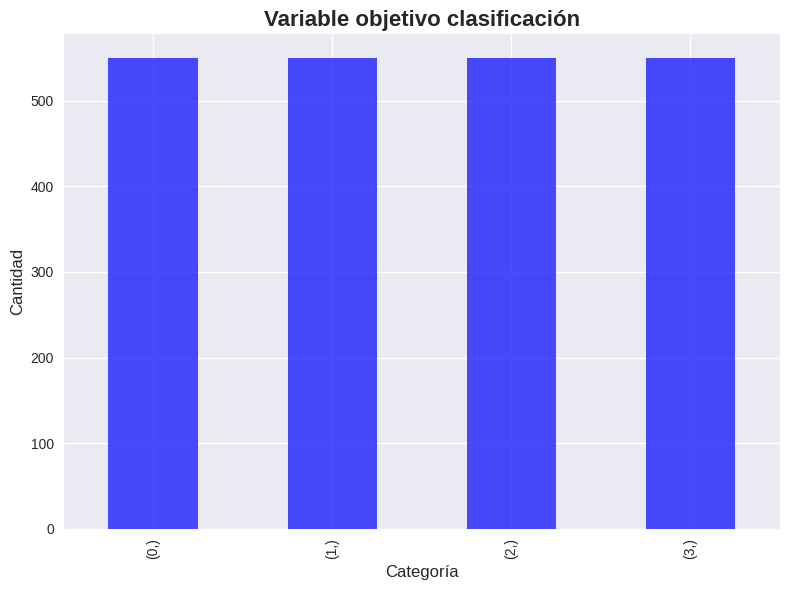

In [73]:
# Contar la cantidad de cada categoría en la columna "categoria"
conteo_categorias = Y.value_counts()
# Configurar el estilo y tamaño del gráfico
plt.style.use('seaborn')
plt.figure(figsize=(8, 6))
# Generar el gráfico de barras
conteo_categorias.plot(kind='bar', color='blue', alpha=0.7)
# Configurar el título y etiquetas del gráfico
plt.title('Variable objetivo clasificación', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##6 Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [74]:
#Parametros elegidos
param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'criterion': ['entropy'],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['auto'],
    'bootstrap': [False]
}

In [222]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

def train_and_evaluate_model(X_train, X_test, y_train, y_test, Modelo, param_grid=None, random_state=13):
    if Modelo not in ['xgboost', 'random_forest']:
        raise ValueError('Modelo debe ser "xgboost" o "random_forest".')

    if Modelo == 'xgboost':
        model = xgb.XGBClassifier(tree_method='gpu_hist', random_state=random_state)
    else:
        model = RandomForestClassifier(random_state=random_state)

    if param_grid is not None:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc_ovr', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        model.set_params(**best_params)

    # Validación cruzada (k-fold cross-validation)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
    print("Mean CV ROC AUC:", cv_scores.mean())

    with tf.device('/GPU:0'):
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return model, accuracy, roc_auc, conf_matrix, best_params

In [272]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

def train_and_evaluate_model(X_train, X_test, y_train, y_test, Modelo, param_grid=None, random_state=13):
    if Modelo not in ['xgboost', 'random_forest']:
        raise ValueError('Modelo debe ser "xgboost" o "random_forest".')

    if Modelo == 'xgboost':
        model = xgb.XGBClassifier(tree_method='gpu_hist', random_state=random_state)
    else:
        model = RandomForestClassifier(random_state=random_state)

    if param_grid is not None:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc_ovr', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        model.set_params(**best_params)

    # Validación cruzada (k-fold cross-validation)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
    print("Mean CV ROC AUC:", cv_scores.mean())

    # Curva de aprendizaje
    #train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
    plt.figure()
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Test Score')
    plt.xlabel('Training examples')
    plt.ylabel('ROC AUC')
    plt.legend(loc='best')
    plt.show()

    with tf.device('/GPU:0'):
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return model, accuracy, roc_auc, conf_matrix, best_params

In [75]:
#Entrenamiento del modelo
model, accuracy, roc_auc, conf_matrix, best_params=train_and_evaluate_model(X_train, X_test, y_train, y_test, 'random_forest', param_grid, random_state=13)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-4-e9325d4e8925>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be

In [76]:
accuracy

0.8795454545454545

In [77]:
roc_auc

0.9693721512322806

In [78]:
conf_matrix

array([[103,   0,  11,   0],
       [  0,  86,  30,   1],
       [  2,   7,  94,   2],
       [  0,   0,   0, 104]])

In [79]:
importance = model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame para visualizar las características más importantes
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
feature_importance_df


,Feature,Importance
19,Finanzas_ingresos_corrientes,0.009352
54,Finanzas_ingresos_tributarios,0.007632
4,Finanzas_funcionamiento,0.007088
42,Poblacion_PobM70-74,0.005715
15,Finanzas_gastos_corrientes,0.005572
...,...,...
586,Economia_Rendimiento_Apio,0.000000
470,Economia_Rendimiento_Asai,0.000000
571,Economia_Rendimiento_Rabano,0.000000
557,Economia_Rendimiento_Maranon,0.000000


##7 Resultados del modelo XG_BOOST

In [ ]:
#Parametos porbados
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

In [ ]:
#Parametros elegidos
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [50],
    'max_depth': [3],
    'min_child_weight': [5],
    'subsample': [1.0],
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'reg_alpha': [0],
    'reg_lambda': [1]
}

In [ ]:
#Entrenamiento del modelo
model, accuracy, roc_auc, conf_matrix, best_params=train_and_evaluate_model(X_train, X_test, y_train, y_test, 'xgboost', param_grid, random_state=13)

In [ ]:
accuracy

0.6244343891402715

In [ ]:
roc_auc

0.8421029195977112

In [ ]:
conf_matrix

array([[15,  0, 26,  6],
       [ 1, 28, 22,  0],
       [ 6, 17, 82,  0],
       [ 5,  0,  3, 10]])

In [ ]:
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
best_params

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 50}

In [ ]:
best_params

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 50,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 1.0}

##8 Comparacion de resultados

In [ ]:
#Seleccionar las variables importantes despues del proceso de selecióm
Variables_seleccion=Varaibles_Selectkbest['Variable'].tolist()
Base_0_X_v2=Base_0_X[Variables_seleccion]
Base_0_X_v2